# 特征缩放

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# 生成模拟数据
np.random.seed(42)
X = np.random.rand(100, 2) * [10, 1000]  # 特征值范围差异很大
y = 3 * X[:, 0] + 0.1 * X[:, 1] + np.random.randn(100) * 10

In [3]:
# 特征缩放前的梯度下降
def gradient_descent(X, y, alpha=0.01, epochs=1000):
    m, n = X.shape
    w = np.random.randn(n)
    b = 0
    J_history = []
    for _ in range(epochs):
        y_hat = np.dot(X, w) + b
        J = ((y - y_hat)**2).mean() / 2
        J_history.append(J)
        Jw = - X.T @ (y - y_hat) / m
        Jb = - (y - y_hat).mean()
        w -= alpha * Jw
        b -= alpha * Jb
    return w, b, J_history

In [4]:

# 特征缩放
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# 梯度下降
_, _, J_history = gradient_descent(X, y)
_, _, J_history_scaled = gradient_descent(X_scaled, y)

/root/miniconda3/envs/ai/lib/python3.11/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipykernel_1633/3561304065.py:9: RuntimeWarning: overflow encountered in square
  J = ((y - y_hat)**2).mean() / 2
/tmp/ipykernel_1633/3561304065.py:11: RuntimeWarning: overflow encountered in matmul
  Jw = - X.T @ (y - y_hat) / m
/tmp/ipykernel_1633/3561304065.py:11: RuntimeWarning: invalid value encountered in matmul
  Jw = - X.T @ (y - y_hat) / m
/tmp/ipykernel_1633/3561304065.py:13: RuntimeWarning: invalid value encountered in subtract
  w -= alpha * Jw


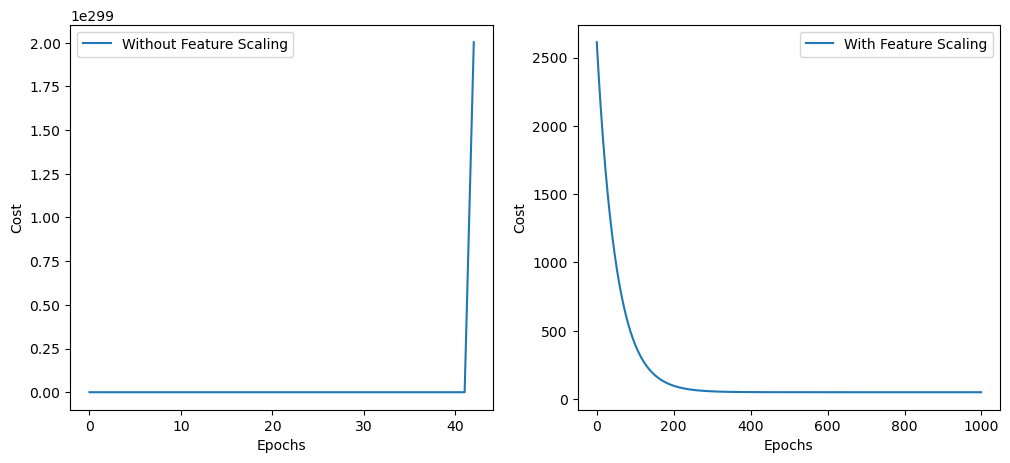

In [6]:

# 绘制代价函数下降曲线
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(J_history, label='Without Feature Scaling')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Cost')
axs[1].plot(J_history_scaled, label='With Feature Scaling')
plt.xlabel('Epochs')
plt.ylabel('Cost')
for ax in axs:
    ax.legend()
plt.show()


## 归一化

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* 常见的归一化方法:
    * z-score 标准化 - Standardization
    * 最小-最大缩放（Min-Max Scaling）
    * 均值归一化（Mean Normalization）
    * 最大绝对值缩放（MaxAbs Scaling）
    * Robust Scaler

### 函数

#### z - score 标准化

In [9]:
def z_score(x: np.ndarray) -> np.ndarray:
    mu = x.mean()
    sigma = np.std(x)
    return (x - mu) / sigma

#### 最大最小缩放

In [10]:
def minmax_scaling(x:np.ndarray) -> np.ndarray: 
    _max, _min = x.max(), x.min()

    return (x - _min) / (_max - _min)

#### 均值归一化

In [11]:
def mean_normal(x: np.ndarray) -> np.ndarray:
    _mean = x.mean()
    _max, _min = x.max(), x.min()
    return (x - _mean) / (_max - _min)

#### 最大绝对值缩放

In [12]:
def maxabs_scaling(x: np.ndarray) -> np.ndarray:
    return x / np.abs(x).max()

### 可视化

In [31]:
y = np.array([np.random.randint(-100, 100)  for i in range(100)])

In [32]:
df = pd.DataFrame(columns=['raw'], data=np.array([y]).T)
df.head()

,raw
0,-5
1,94
2,54
3,-8
4,59


In [33]:
df['z_score'] = z_score(df['raw'].values)
df['minmax_scaling'] = minmax_scaling(df['raw'].values)
df['mean_normal'] = mean_normal(df['raw'].values)
df['maxabs_scaling'] = maxabs_scaling(df['raw'].values)

In [34]:
df.head()

,raw,z_score,minmax_scaling,mean_normal,maxabs_scaling
0,-5,0.219708,0.489691,0.063196,-0.05
1,94,1.993858,1.000000,0.573505,0.94
2,54,1.277030,0.793814,0.367320,0.54
3,-8,0.165946,0.474227,0.047732,-0.08
4,59,1.366633,0.819588,0.393093,0.59


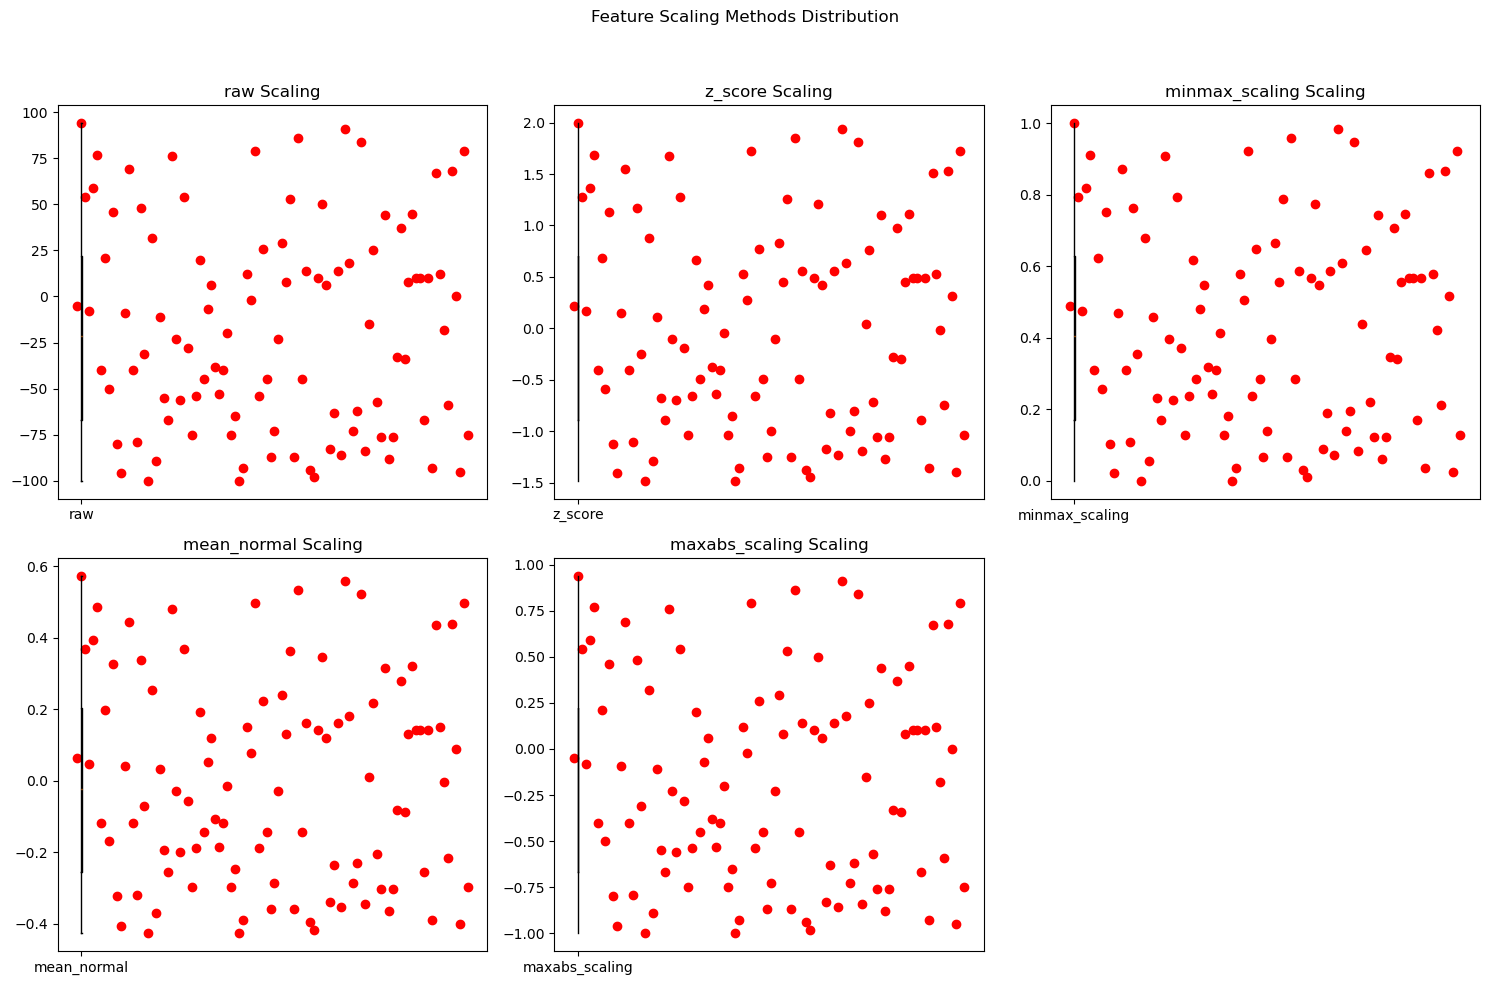

In [36]:
features = df.columns
# 创建一个包含多个子图的画布
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Feature Scaling Methods Distribution')
# 绘制各特征的分布图
for i, feature in enumerate(features):
    ax = axs[i // 3, i % 3]
    ax.boxplot(df[feature])
    ax.scatter(range(len(df[feature])), df[feature], color='red')
    ax.set_title(f'{feature} Scaling')
    ax.set_xticklabels([feature])
# 隐藏多余的子图
fig.delaxes(axs[1, 2])
# 调整子图布局
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()